In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df1=pd.read_excel('data0.xlsx') 

In [32]:
rate_origin=df1['target']#为了之后反归一化
df=(df1-df1.min())/(df1.max()-df1.min())
X=df.iloc[:,:-1]
y=df['target']#切片是前闭后开[)
print(X.shape)
print(y.shape)

(35033, 7)
(35033,)


In [33]:
y=pd.DataFrame(y.values,columns=['goal'])
x=X
cut=96*4
X_train, X_test=x.iloc[:-cut],x.iloc[-cut:]#列表的切片操作，X.iloc[0:2400，0:7]即为1-2400行，1-7列
y_train, y_test=y.iloc[:-cut],y.iloc[-cut:]
print(X_train.size)#通过输出训练集测试集的大小来判断数据格式正确。
print(X_test.size)
print(y_train.size)
print(y_test.size)

242543
2688
34649
384


In [34]:
X_train,X_test,y_train,y_test=X_train.values,X_test.values,y_train.values,y_test.values
print(X_train)
print(y_train)

[[0.47213539 0.45068896 0.47121539 ... 0.47522854 0.47076459 0.4091858 ]
 [0.45068896 0.47121539 0.46080521 ... 0.47076459 0.48983962 0.4091858 ]
 [0.47121539 0.46080521 0.47522854 ... 0.48983962 0.51183691 0.41057759]
 ...
 [0.57680878 0.5562121  0.58824721 ... 0.58900135 0.62805783 0.41336117]
 [0.5562121  0.58824721 0.5866781  ... 0.62805783 0.59315944 0.41336117]
 [0.58824721 0.5866781  0.58900135 ... 0.59315944 0.59767404 0.41266527]]
[[0.48983962]
 [0.51183691]
 [0.51428857]
 ...
 [0.59315944]
 [0.59767404]
 [0.60993785]]


In [35]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
model = Sequential()  #层次模型
model.add(Dense(64,input_dim=7,init='uniform')) #输入层，Dense表示BP层
model.add(Activation('relu'))  #添加激活函数
model.add(Dense(1))  #输出层
model.compile(loss='mean_squared_error', optimizer='Adam') #编译模型
model.fit(X_train, y_train, nb_epoch = 50, batch_size = 16) #训练模型1000次

E:\anoconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer="uniform", input_dim=7)`
  """
E:\anoconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Epoch 1/50
34649/34649 [==============================] - 2s 70us/step - loss: 0.0022: 0
Epoch 2/50
34649/34649 [==============================] - 2s 62us/step - loss: 7.3940e-04
Epoch 3/50
34649/34649 [==============================] - 2s 62us/step - loss: 6.8788e-04
Epoch 4/50
34649/34649 [==============================] - 2s 53us/step - loss: 6.8664e-04
Epoch 5/50
34649/34649 [==============================] - 2s 51us/step - loss: 6.8002e-04
Epoch 6/50
34649/34649 [==============================] - 2s 52us/step - loss: 6.7988e-04
Epoch 7/50
34649/34649 [==============================] - 2s 54us/step - loss: 6.7929e-04
Epoch 8/50
34649/34649 [==============================] - 2s 54us/step - loss: 6.8072e-04
Epoch 9/50
34649/34649 [==============================] - 2s 59us/step - loss: 6.7581e-04
Epoch 10/50
34649/34649 [==============================] - 2s 56us/step - loss: 6.7979e-04
Epoch 11/50
34649/34649 [==============================] - 2s 71us/step - loss: 6.7596e-04
Epoch 12/

In [36]:
model.summary()#模型描述

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                512       
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [37]:
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]

Text(0.5,1,'Train Data')

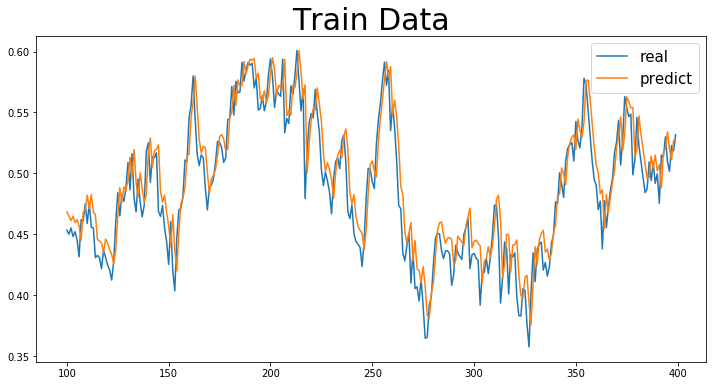

In [38]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:400,0].plot(figsize=(12,6))
draw.iloc[100:400,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

In [39]:
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]

Text(0.5,1,'Test Data')

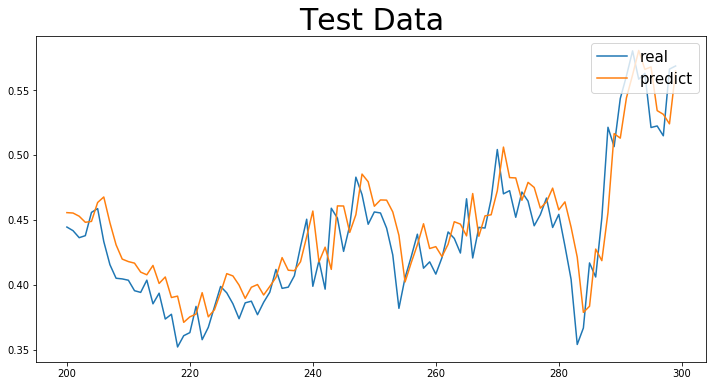

In [40]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[200:300,0].plot(figsize=(12,6))
draw.iloc[200:300,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('训练集上的MAE和MSE')
print(mean_absolute_error(model.predict(X_train), y_train))
print(mean_squared_error(model.predict(X_train), y_train) )
print('测试集上的MAE和MSE')
print(mean_absolute_error(model.predict(X_test), y_test))
print(mean_squared_error(model.predict(X_test), y_test) )

训练集上的MAE和MSE
0.018917806256710298
0.0006943387659810379
测试集上的MAE和MSE
0.01967619786112614
0.0006381822419569743


In [42]:
out=y_test_predict*(rate_origin.max()-rate_origin.min())+rate_origin.min()
df0 = pd.DataFrame(out,columns=['predict'])
df00=pd.read_excel('data.xlsx') 
df00=df00.iloc[-384:,1:3]
df000=pd.DataFrame(df00.values,columns=['electrcity','date'])
df0000=pd.concat([df000, df0],axis=1)
df0000.tail()

,electrcity,date,predict
379,10881.9905,10793.52,1.000727
380,10871.7511,10763.88,1.008286
381,10890.5559,10762.17,1.010701
382,10757.4210,10731.92,1.012694
383,10765.7453,10731.10,1.005198


In [43]:
real=df0000['date']*df0000['predict']
real=pd.DataFrame(real,columns=['real'])
draw=pd.concat([df0000['electrcity'],real],axis=1)
draw.tail()

,electrcity,real
379,10881.9905,10801.367509
380,10871.7511,10853.074635
381,10890.5559,10877.339196
382,10757.4210,10868.152285
383,10765.7453,10786.877719


Text(0.5,1,'Test Data')

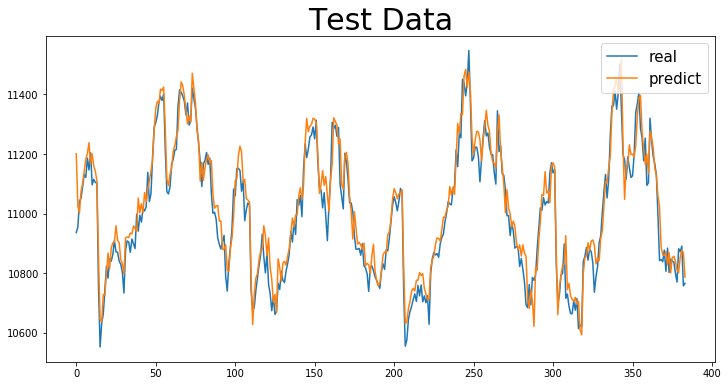

In [44]:
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [45]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('测试集上MAE\MSE\RMSE\MAPE')
print(mean_absolute_error(draw.iloc[:,0], draw.iloc[:,1]))
print(mean_squared_error(draw.iloc[:,0], draw.iloc[:,1]) )
print(math.sqrt(mean_squared_error(draw.iloc[:,0], draw.iloc[:,1])))
print(mape(draw.iloc[:,0], draw.iloc[:,1]) )

测试集上MAE\MSE\RMSE\MAPE
47.774263703087264
3755.5053532690727
61.282178104805254
0.4350246624612868
